# Part 1: clean data

## step1: clean agricultural_production_data(FAO)

In [4]:
import pandas as pd
import os

In [10]:
data_folder = '../../data/raw/cross-national study/Agricultural Production_FAO'
df = pd.read_csv(f"{data_folder}/Agricultural Production_FAO/Production_Crops_Livestock_E_All_Data_NOFLAG.csv")
df.head(2)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0,36862.0,36462.0,37000.0
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,1999.6,1652.1,1685.9,1378.8,1716.1,1308.3,1775.9,1743.2,1742.0,1810.8


In [16]:
target_countries = ["Japan", "Germany", "Spain", "Italy"]
df = df[df["Area"].isin(target_countries)]
df = df[df["Element"] == "Production"]
df = df[[col for col in df.columns if "Code" not in col]]
df = df.reset_index(drop=True)

df.head(10)

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,Germany,Apples,Production,t,851000.0,2059000.0,2216000.0,1346000.0,1424000.0,1702000.0,...,1115900.00,973462.00,1032913.00,596666.00,1198520.0,991450.0,1023320.0,1004630.0,1070980.0,941210.0
1,Germany,Apricots,Production,t,2900.0,2000.0,4198.0,3100.0,1751.0,1588.0,...,219.53,232.14,228.66,226.78,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,Asparagus,Production,t,16300.0,16100.0,18700.0,21200.0,16000.0,22493.0,...,114090.00,113613.30,120014.00,130881.00,133020.0,130560.0,117560.0,119270.0,110300.0,111900.0
3,Germany,Avocados,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,Germany,Bananas,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,Germany,Barley,Production,t,3669020.0,4908212.0,4759281.0,5411377.0,5015922.0,5394619.0,...,11562800.00,11629900.00,10730500.00,10853400.00,9583600.0,11591500.0,10769200.0,10411100.0,11207100.0,10999900.0
6,Germany,"Beans, dry",Production,t,12693.0,15787.0,16938.0,10626.0,8656.0,8466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Germany,"Beer of barley, malted",Production,t,6895700.0,7335100.0,7684300.0,8332300.0,8652000.0,8968300.0,...,8723136.00,8721339.00,8677578.00,8480625.00,8656824.0,8040566.0,8702700.0,8544300.0,8783200.0,NaN
8,Germany,Blueberries,Production,t,NaN,NaN,NaN,NaN,NaN,NaN,...,12077.00,11945.00,10710.00,13805.00,12760.0,14850.0,11300.0,15640.0,15370.0,15320.0
9,Germany,"Broad beans and horse beans, dry",Production,t,80900.0,104195.0,99351.0,102804.0,113832.0,118016.0,...,87600.00,133200.00,153700.00,188800.00,160800.0,159500.0,235800.0,235900.0,249500.0,175300.0


In [17]:
year_cols = [col for col in df.columns if col.startswith("Y")]
df_long = df.melt(
    id_vars=["Area", "Item", "Element", "Unit"],   # 保留这些列不动
    value_vars=year_cols,                          # 需要展开的列（年份）
    var_name="Year",                               # 展开后的列名：年份
    value_name="Value"                             # 展开后的列名：产量
)
df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})")
df_long.head(10)

,Area,Item,Element,Unit,Year,Value
0,Germany,Apples,Production,t,1961,851000.0
1,Germany,Apricots,Production,t,1961,2900.0
2,Germany,Asparagus,Production,t,1961,16300.0
3,Germany,Avocados,Production,t,1961,NaN
4,Germany,Bananas,Production,t,1961,NaN
5,Germany,Barley,Production,t,1961,3669020.0
6,Germany,"Beans, dry",Production,t,1961,12693.0
7,Germany,"Beer of barley, malted",Production,t,1961,6895700.0
8,Germany,Blueberries,Production,t,1961,NaN
9,Germany,"Broad beans and horse beans, dry",Production,t,1961,80900.0


## step2: clean climate_data (OWID)







In [2]:
import pandas as pd
import os

data_folder = '../../data/raw/cross-national study/climate_data _OWID/climate_data _OWID/monthly-average-surface-temperatures-by-year'
temp_df = pd.read_csv(f"{data_folder}/monthly-average-surface-temperatures-by-year.csv")
temp_df.head(2)

,Entity,Code,Year,2025,2024,2023,2022,2021,2020,2019,...,1959,1958,1956,1954,1952,1957,1955,1953,1951,1950
0,Afghanistan,AFG,1,-1.812812,3.300064,-4.335608,-0.322859,-1.001608,-2.560545,0.585145,...,-2.333814,0.576404,-3.351925,-2.276692,-2.812619,-4.239172,-2.191683,-2.915993,-3.126317,-2.655707
1,Afghanistan,AFG,2,1.728558,1.024550,4.187041,2.165870,5.688000,2.880046,0.068664,...,-1.545529,0.264962,0.455350,-0.304205,0.798226,-2.747945,1.999074,1.983414,-2.642800,-3.996040


In [3]:
target_countries = ["Japan", "Germany", "Spain", "Italy"]
temp_df = temp_df[temp_df["Entity"].isin(target_countries)]

temp_df.head(5)

,Entity,Code,Year,2025,2024,2023,2022,2021,2020,2019,...,1959,1958,1956,1954,1952,1957,1955,1953,1951,1950
924,Germany,DEU,1,2.019176,1.539955,3.626494,2.806345,0.667262,3.532432,0.722000,...,-0.116038,-0.421879,0.217203,-3.254344,0.187323,0.129954,-1.864191,-0.881841,1.430572,-0.994760
925,Germany,DEU,2,1.537303,6.646778,3.282579,4.532697,1.817147,5.343970,4.112094,...,-0.148791,1.968528,-9.977055,-3.696044,-0.054818,3.935786,-1.961799,-0.060099,1.972033,3.061355
926,Germany,DEU,3,6.076815,7.552429,5.780346,5.241647,4.865992,5.380081,6.704629,...,6.338524,-0.275784,2.971595,4.462193,2.629372,6.436402,0.381635,4.989328,2.388841,4.984322
927,Germany,DEU,4,10.581038,10.149447,7.586209,7.828894,6.135363,10.560516,9.785563,...,9.586491,5.257608,5.255665,5.867049,10.389263,7.499947,6.898544,9.158531,7.406067,6.919163
928,Germany,DEU,5,NaN,15.140265,13.187914,14.566760,10.796934,12.054605,11.118146,...,12.792577,13.483042,12.558229,12.237287,12.350787,9.850443,10.368385,13.297674,11.544678,13.779639


In [4]:
non_year_cols = ["Entity", "Code", "Year"]
year_cols = [col for col in temp_df.columns if col not in non_year_cols]
temp_long = temp_df.melt(
    id_vars="Entity",
    value_vars=year_cols,
    var_name="Year",
    value_name="Temperature (°C)"
)
temp_long["Year"] = temp_long["Year"].astype(int)

temp_long.head(5)

,Entity,Year,Temperature (°C)
0,Germany,2025,2.019176
1,Germany,2025,1.537303
2,Germany,2025,6.076815
3,Germany,2025,10.581038
4,Germany,2025,NaN


In [43]:
precip_df = pd.read_csv("average-precipitation-per-year.csv")
precip_df = precip_df[precip_df["Entity"].isin(target_countries)]
precip_df = precip_df.rename(columns={"Annual precipitation": "Precipitation (mm)"})
precip_df = precip_df[["Entity", "Year", "Precipitation (mm)"]]

precip_df.head(5)

,Entity,Year,Precipitation (mm)
5950,Germany,1940,776.32135
5951,Germany,1941,846.49840
5952,Germany,1942,639.55230
5953,Germany,1943,643.28120
5954,Germany,1944,784.10260


In [44]:
merged = pd.merge(temp_long, precip_df, on=["Entity", "Year"])
merged = merged.rename(columns={"Entity": "Country"})
merged = merged[["Country", "Year", "Temperature (°C)", "Precipitation (mm)"]]
merged = merged.sort_values(by=["Country", "Year"])

merged.head(5)

,Country,Year,Temperature (°C),Precipitation (mm)
3552,Germany,1950,-0.994760,790.8431
3553,Germany,1950,3.061355,790.8431
3554,Germany,1950,4.984322,790.8431
3555,Germany,1950,6.919163,790.8431
3556,Germany,1950,13.779639,790.8431


In [ ]:
merged.to_csv("climate_data.csv", index=False)

## step3: clean control_variables (global_macro_data)



In [45]:
from global_macro_data import gmd
import pandas as pd

countries = ["JPN", "DEU", "ESP", "ITA"]

variables = [
    "rGDP_pc", "nGDP", "pop", "urban", "infl",
    "unemp", "govexp", "govrev", "lifeexp", "open"
]

df = gmd(country=countries, variables=variables)

df.rename(columns={
    "ISO3": "Country Code",
    "year": "Year",
    "rGDP_pc": "Real GDP per capita",
    "nGDP": "Nominal GDP",
    "pop": "Population",
    "urban": "Urbanization (%)",
    "infl": "Inflation (%)",
    "unemp": "Unemployment (%)",
    "govexp": "Government expenditure (%GDP)",
    "govrev": "Government revenue (%GDP)",
    "lifeexp": "Life expectancy",
    "open": "Trade openness (%GDP)"
}, inplace=True)

df = df.sort_values(by=["Country Code", "Year"])
df = df[df["Year"] >= 1960]

df.head(5)


Downloading: https://www.globalmacrodata.com/GMD_2025_03.csv
Filtered data for countries: JPN, DEU, ESP, ITA
Available variables are:
- BankingCrisis  - CA  - CA_GDP  - CPI  
- CurrencyCrisis  - HPI  - ISO3  - M0  
- M1  - M2  - M3  - M4  
- REER  - SovDebtCrisis  - USDfx  - cbrate  
- cons  - cons_GDP  - countryname  - deflator  
- exports  - exports_GDP  - finv  - finv_GDP  
- govdebt  - govdebt_GDP  - govdef  - govdef_GDP  
- govexp  - govexp_GDP  - govrev  - govrev_GDP  
- govtax  - govtax_GDP  - id  - imports  
- imports_GDP  - infl  - inv  - inv_GDP  
- ltrate  - nGDP  - pop  - rGDP  
- rGDP_USD  - rGDP_pc  - rcons  - strate  
- unemp  - year  

Selected 10 variables
Final dataset: 2411 observations of 10 variables


,Country Code,countryname,Year,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
12110,DEU,Germany,1960,10404.326,181644.41,72.814903,1.536615,1.0,34951.934,59474.734
12111,DEU,Germany,1961,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.180
12112,DEU,Germany,1962,11167.556,216489.94,74.025787,2.843273,0.6,43157.031,72565.500
12113,DEU,Germany,1963,11367.286,229445.28,74.714355,2.966959,0.7,46979.828,76667.648
12114,DEU,Germany,1964,12024.808,252133.55,75.318336,2.335735,0.6,50310.246,84426.820


In [ ]:
df.to_csv("four_country_control_variables.csv", index=False)

# Part 2: merge data



In [18]:
import pandas as pd
import os

In [19]:
data_folder = '../../data/processed/cross-national study'
agri_df = pd.read_csv(f"{data_folder}/agricultural_production_data_LongPanel.csv")
agri_df.head(5)

,Area,Year,Item,Element,Unit,Value
0,Germany,1961,Apples,Production,t,851000.0
1,Germany,1961,Apricots,Production,t,2900.0
2,Germany,1961,Asparagus,Production,t,16300.0
3,Germany,1961,Avocados,Production,t,NaN
4,Germany,1961,Bananas,Production,t,NaN


In [20]:
climate_df = pd.read_csv(f"{data_folder}/climate_data.csv")
climate_df.head(5)

,Country,Year,Temperature (°C),Precipitation (mm)
0,Germany,1950,-0.994760,790.8431
1,Germany,1950,3.061355,790.8431
2,Germany,1950,4.984322,790.8431
3,Germany,1950,6.919163,790.8431
4,Germany,1950,13.779639,790.8431


In [21]:
control_df = pd.read_csv(f"{data_folder}/four_country_control_variables.csv")
control_df.head(5)

,Country Code,countryname,Year,Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
0,DEU,Germany,1960,10404.326,181644.41,72.814903,1.536615,1.0,34951.934,59474.734
1,DEU,Germany,1961,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.180
2,DEU,Germany,1962,11167.556,216489.94,74.025787,2.843273,0.6,43157.031,72565.500
3,DEU,Germany,1963,11367.286,229445.28,74.714355,2.966959,0.7,46979.828,76667.648
4,DEU,Germany,1964,12024.808,252133.55,75.318336,2.335735,0.6,50310.246,84426.820


In [24]:
iso3_to_name = {
    "JPN": "Japan",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy"
}
control_df["Country"] = control_df["Country Code"].map(iso3_to_name)
climate_control_df = pd.merge(climate_df, control_df, on=["Country", "Year"], how="inner")
agri_df = agri_df.rename(columns={"Area": "Country"})
agri_df["Year"] = agri_df["Year"].astype(int)
final_df = pd.merge(agri_df, climate_control_df, on=["Country", "Year"], how="left")
final_df = final_df.drop(columns=["Country Code", "countryname"], errors="ignore")
final_df.to_csv("merged_agri_climate_control.csv", index=False)
final_df.head(5)

,Country,Year,Item,Element,Unit,Value,Temperature (°C),Precipitation (mm),Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
0,Germany,1961,Apples,Production,t,851000.0,-0.725017,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
1,Germany,1961,Apples,Production,t,851000.0,4.590780,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
2,Germany,1961,Apples,Production,t,851000.0,6.488963,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
3,Germany,1961,Apples,Production,t,851000.0,10.891521,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18
4,Germany,1961,Apples,Production,t,851000.0,10.594926,882.0518,10768.331,199046.14,73.377632,2.293686,0.7,40713.309,69373.18


# Part 3: descriptive statistics

In [25]:
import pandas as pd
import os
data_folder = '../../data/processed/cross-national study'
df = pd.read_csv(f"{data_folder}/merged_agri_climate_control.csv")
df.describe()

,Year,Value,Temperature (°C),Precipitation (mm),Real GDP per capita,Nominal GDP,Population,Inflation (%),Unemployment (%),Government expenditure (%GDP),Government revenue (%GDP)
count,557172.000000,4.771920e+05,557172.000000,557172.000000,5.571720e+05,5.571720e+05,557172.000000,557172.000000,557172.000000,5.552160e+05,5.552160e+05
mean,1992.000000,1.298983e+06,11.866928,1058.656339,6.819116e+05,8.188544e+07,71.110554,4.610005,7.045456,2.983479e+07,2.590089e+07
std,18.184259,4.096815e+06,7.042116,427.923744,1.346915e+06,1.775186e+08,29.773281,4.829335,5.430681,6.684036e+07,5.761763e+07
min,1961.000000,0.000000e+00,-7.269345,471.727170,6.236144e+03,5.174030e+03,30.739250,-1.352839,0.500000,4.882930e+02,8.891562e+02
25%,1976.000000,7.547000e+03,6.138618,749.545100,1.669605e+04,3.200004e+05,46.773056,1.606529,2.767088,8.328064e+04,1.031457e+05
50%,1992.000000,7.653900e+04,11.520030,919.361400,2.421639e+04,1.119010e+06,59.133175,3.053744,5.439179,4.938150e+05,4.440370e+05
75%,2008.000000,5.453000e+05,17.890762,1204.268200,3.447310e+04,3.129374e+06,82.534180,5.910339,10.050232,1.334629e+06,1.363672e+06
max,2023.000000,5.201040e+07,26.357111,2345.827600,4.443114e+06,5.918812e+08,128.070010,24.538044,26.100000,2.538245e+08,2.190696e+08


In [28]:
missing_rate = df.isnull().mean().sort_values(ascending=False).to_frame(name="Missing Rate")
missing_rate

,Missing Rate
Value,0.143546
Government revenue (%GDP),0.003511
Government expenditure (%GDP),0.003511
Item,0.000000
Element,0.000000
Year,0.000000
Country,0.000000
Temperature (°C),0.000000
Unit,0.000000
Precipitation (mm),0.000000


In [29]:
yearly_counts = df["Year"].value_counts().sort_index()
yearly_counts

Year
1961    8844
1962    8844
1963    8844
1964    8844
1965    8844
        ... 
2019    8844
2020    8844
2021    8844
2022    8844
2023    8844
Name: count, Length: 63, dtype: int64

# Part 4: visualization




In [ ]:
import pandas as pd
import os
data_folder = '../../data/processed/cross-national study'
df = pd.read_csv(f"{data_folder}/merged_agri_climate_control.csv")

## 4.1 Time series

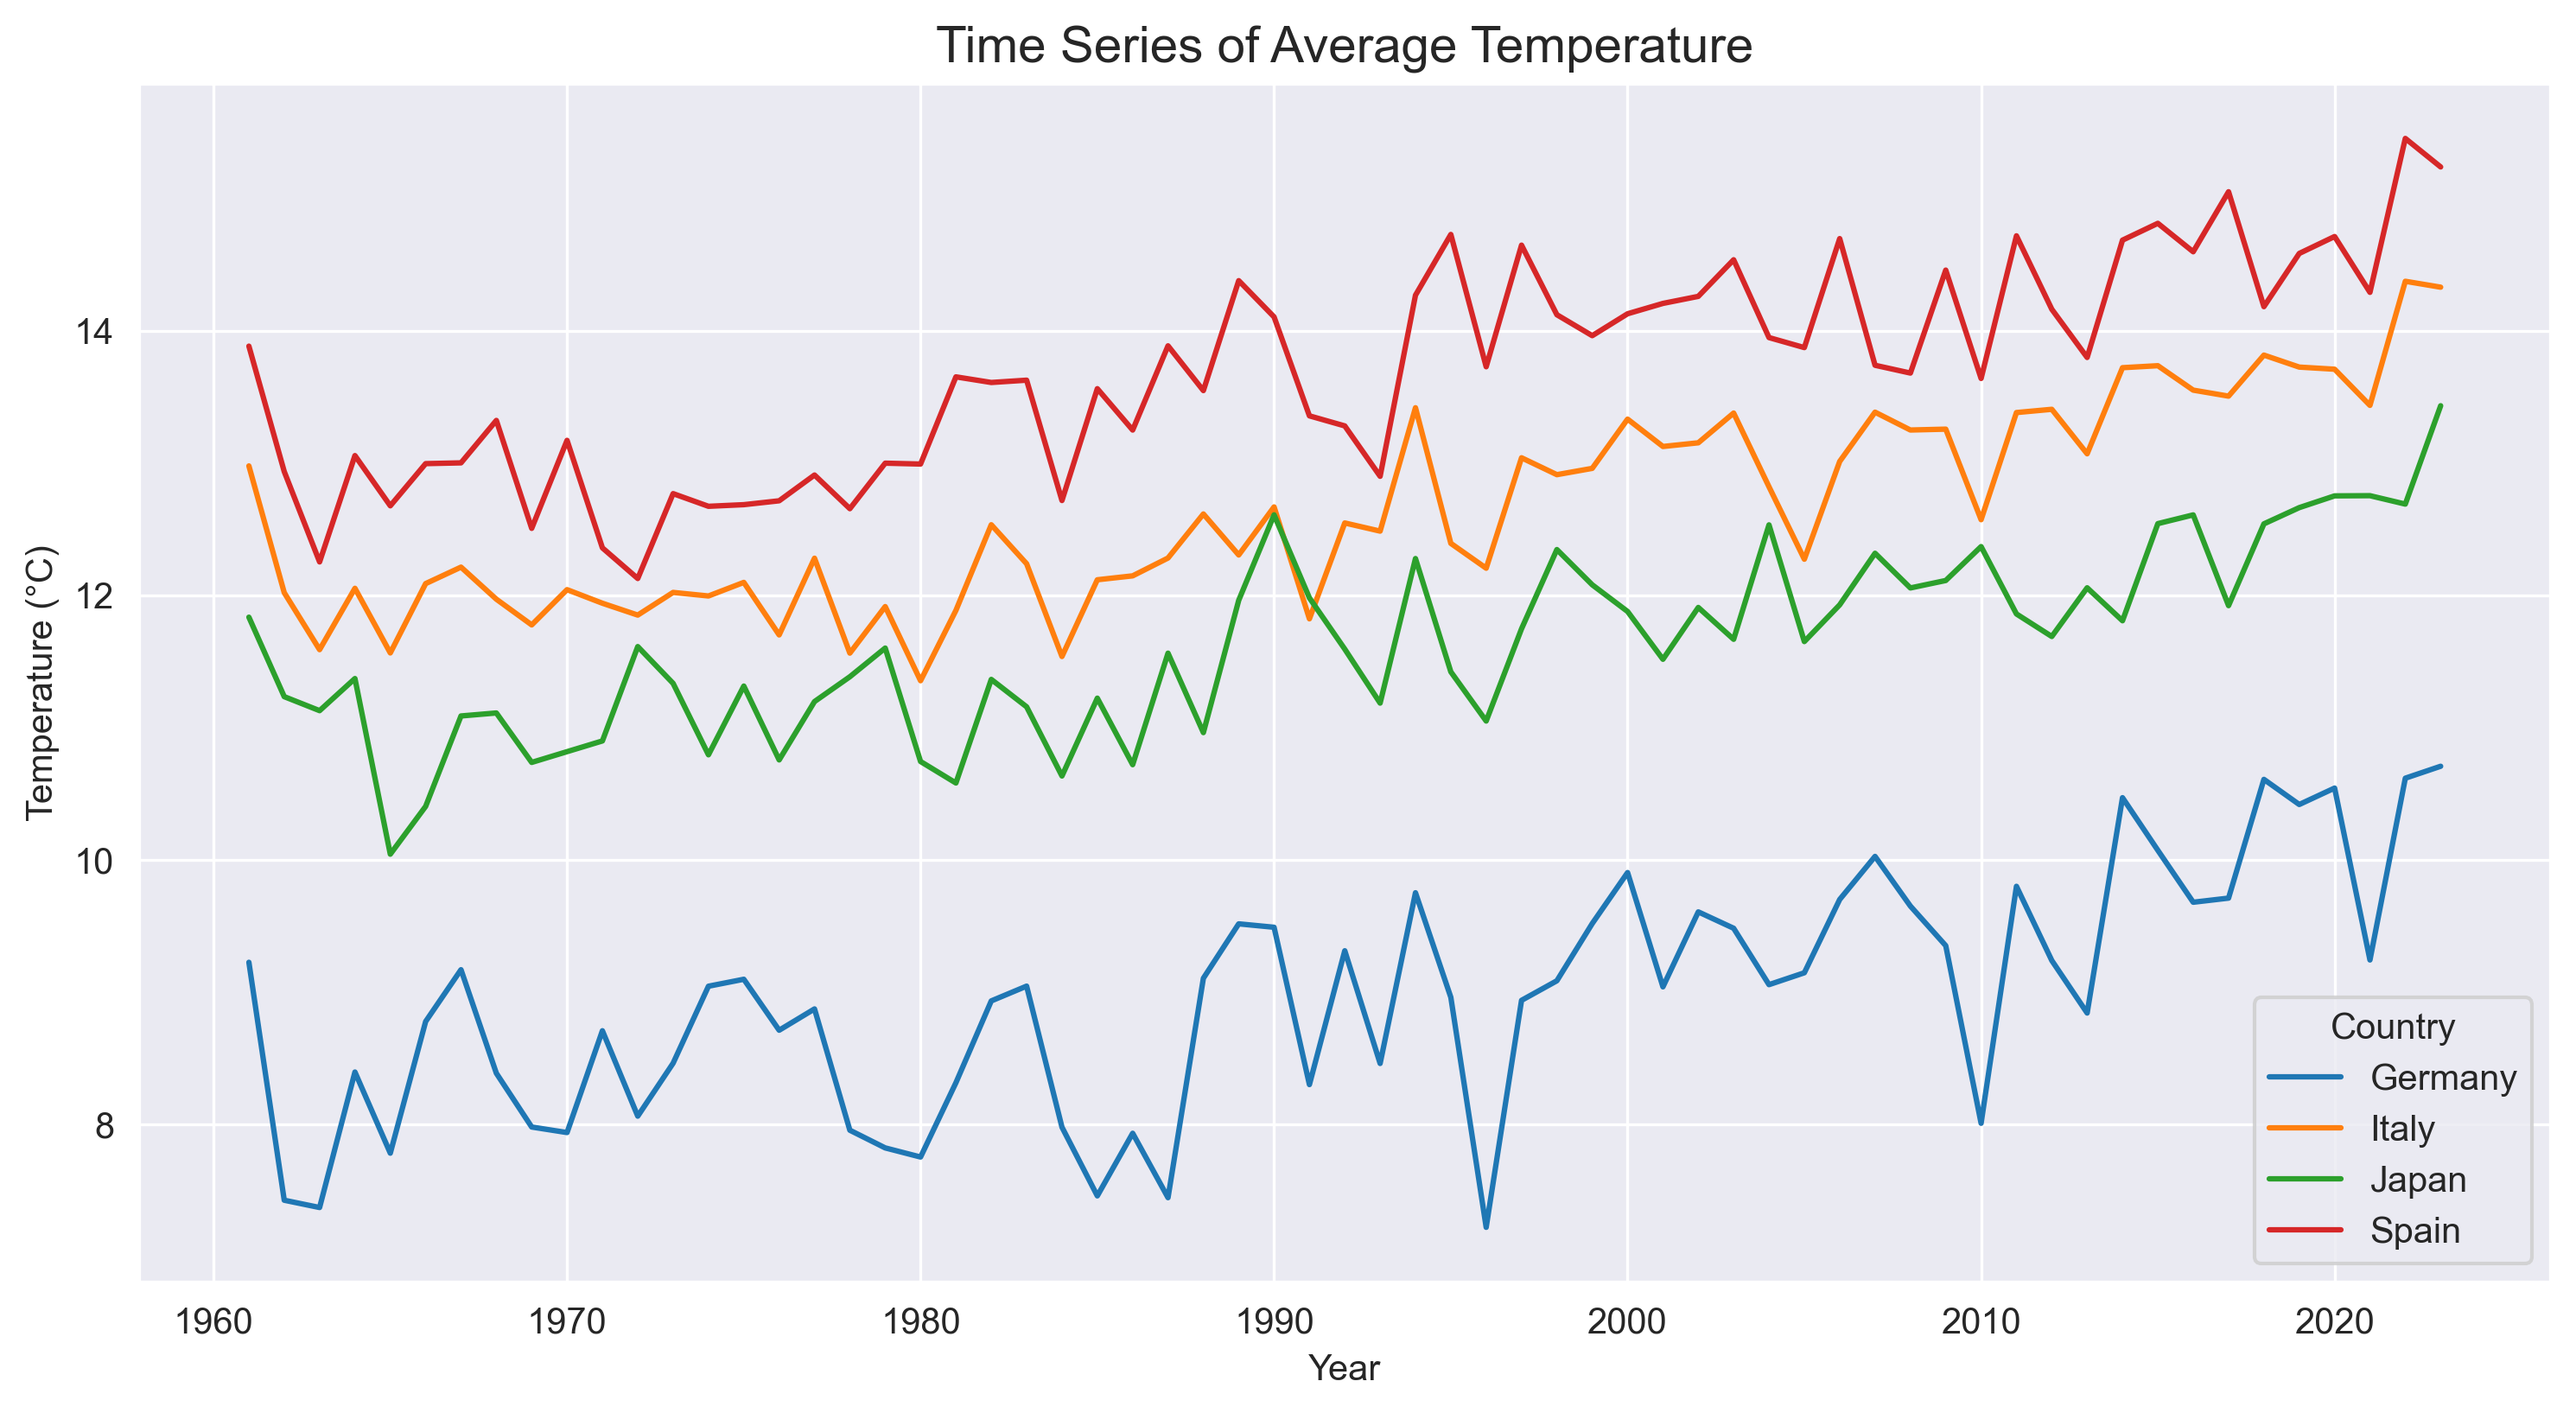

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(data=df, x="Year", y="Temperature (°C)", hue="Country", errorbar=None)
plt.title("Time Series of Average Temperature", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)

plt.savefig("temperature_trend_highres.png", dpi=300)
plt.show()

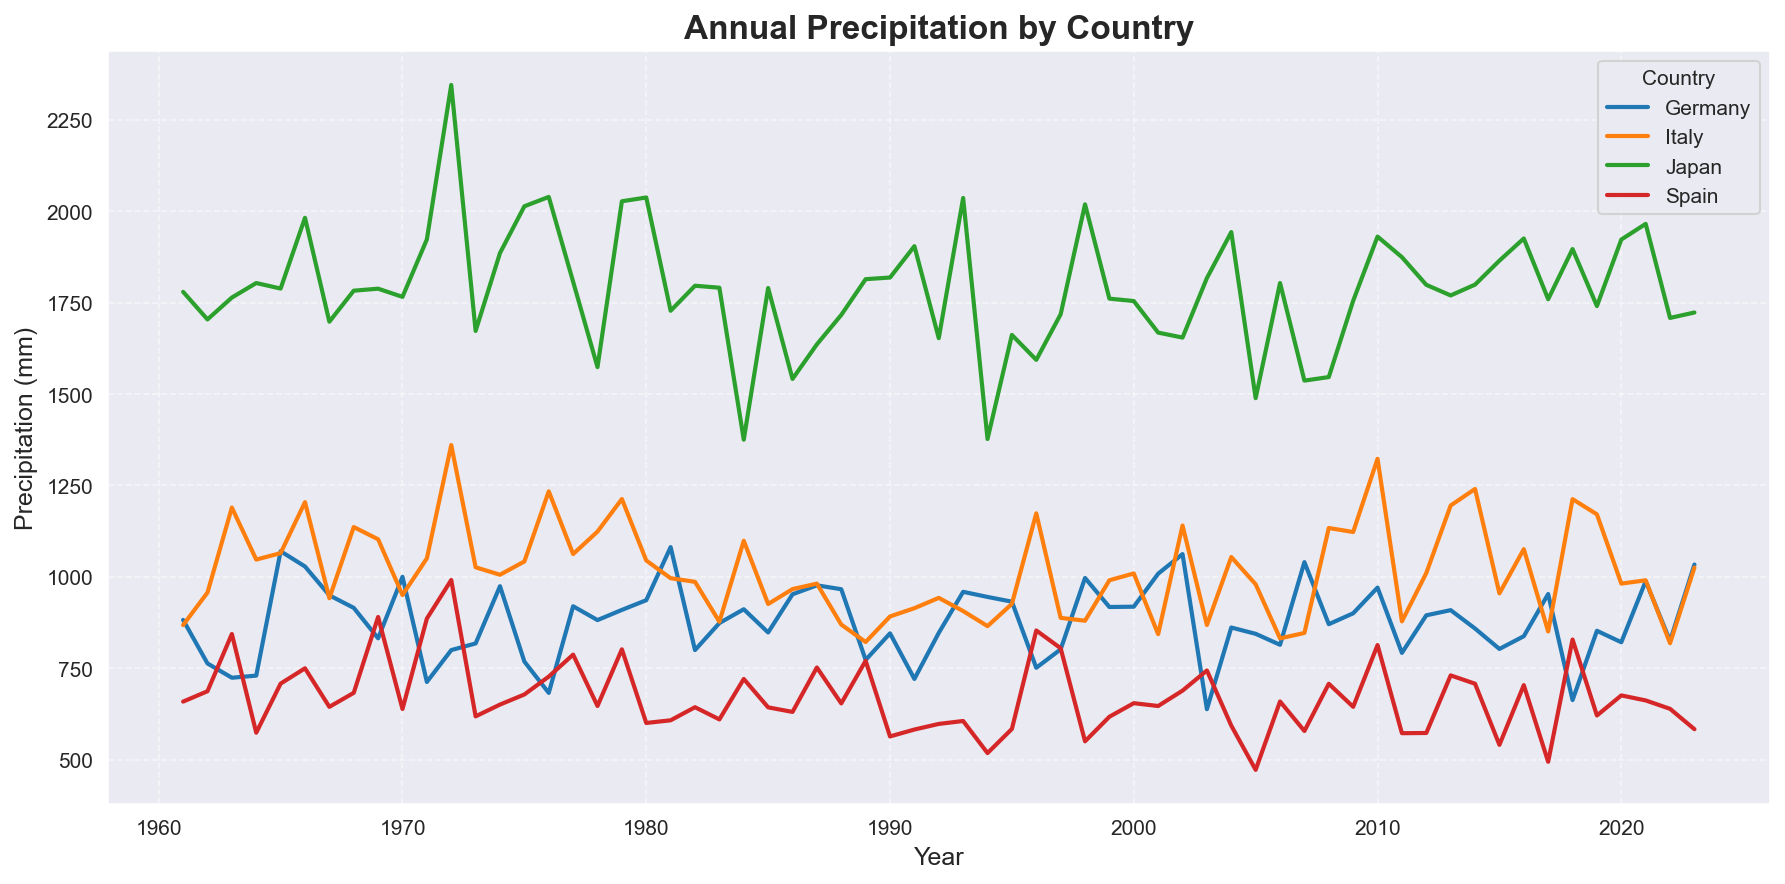

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6), dpi=150)  # 高分辨率

sns.lineplot(
    data=df,
    x="Year",
    y="Precipitation (mm)",
    hue="Country",
    errorbar=None,
    linewidth=2
)

plt.title("Annual Precipitation by Country", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)

plt.legend(title="Country", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Annual Precipitation by Country.png", dpi=300)
plt.show()

## 4.2 Bar plot

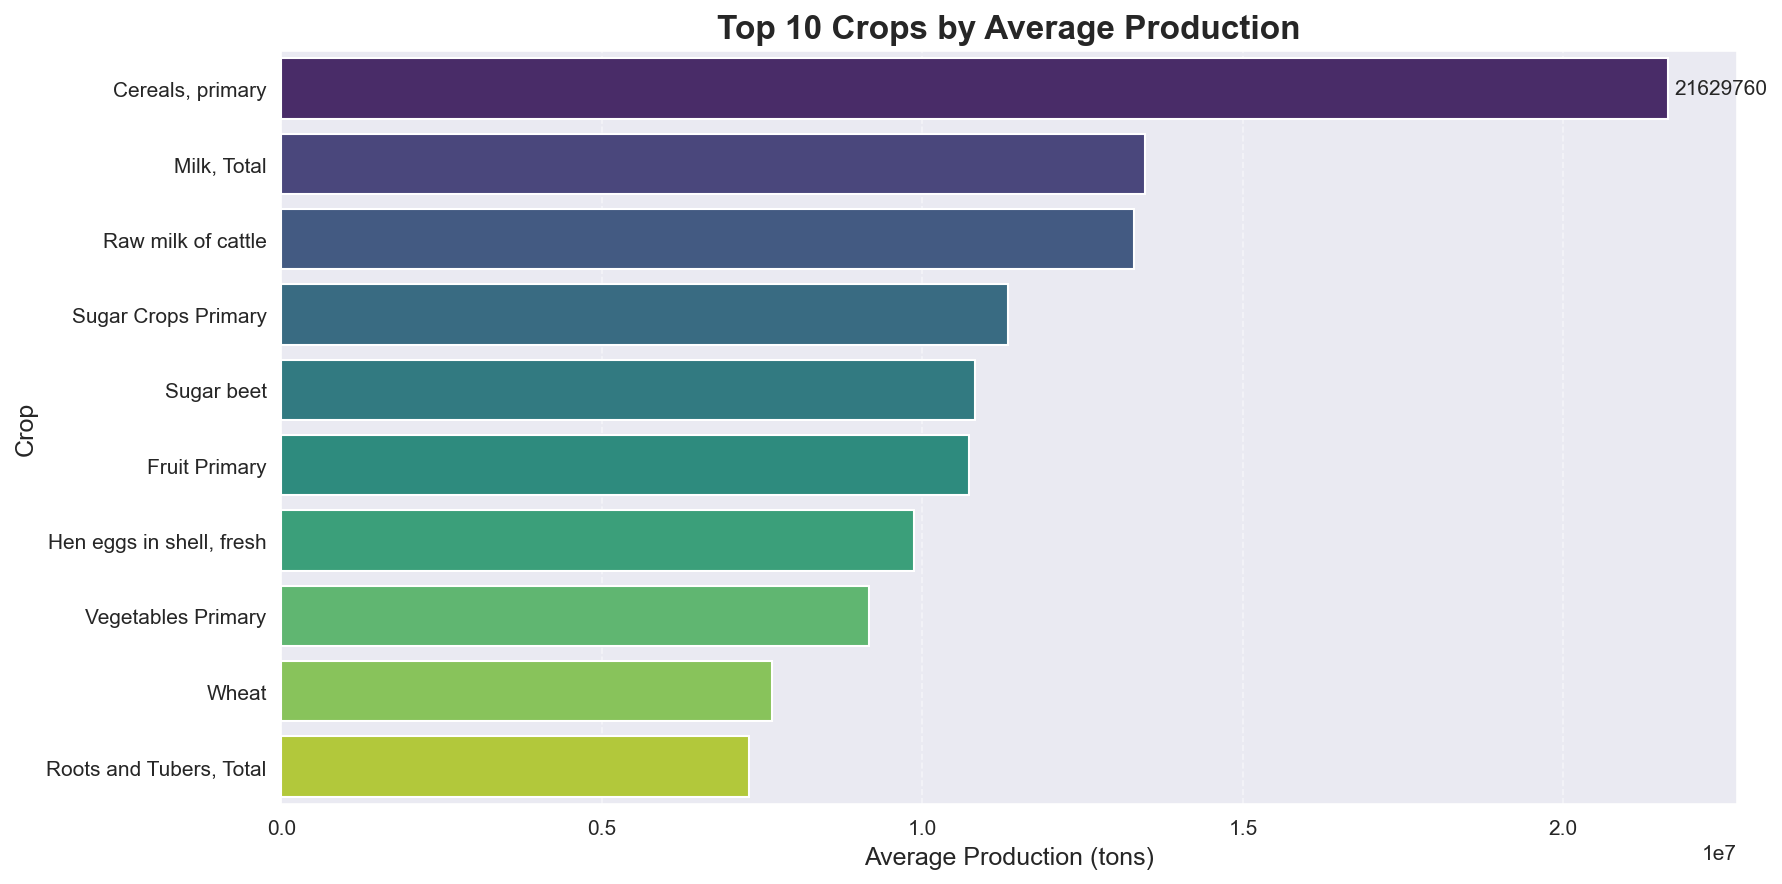

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

crop_avg = df.groupby("Item")["Value"].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6), dpi=150)
ax = sns.barplot(data=crop_avg, x="Value", y="Item", hue="Item", dodge=False, palette="viridis", legend=False)
ax.bar_label(container=ax.containers[0], fmt="%.0f", padding=3, fontsize=10)

plt.title("Top 10 Crops by Average Production", fontsize=16, weight="bold")
plt.xlabel("Average Production (tons)", fontsize=12)
plt.ylabel("Crop", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Top 10 Crops by Average Production.png", dpi=300)

plt.show()

## 4.3 Scatter plots





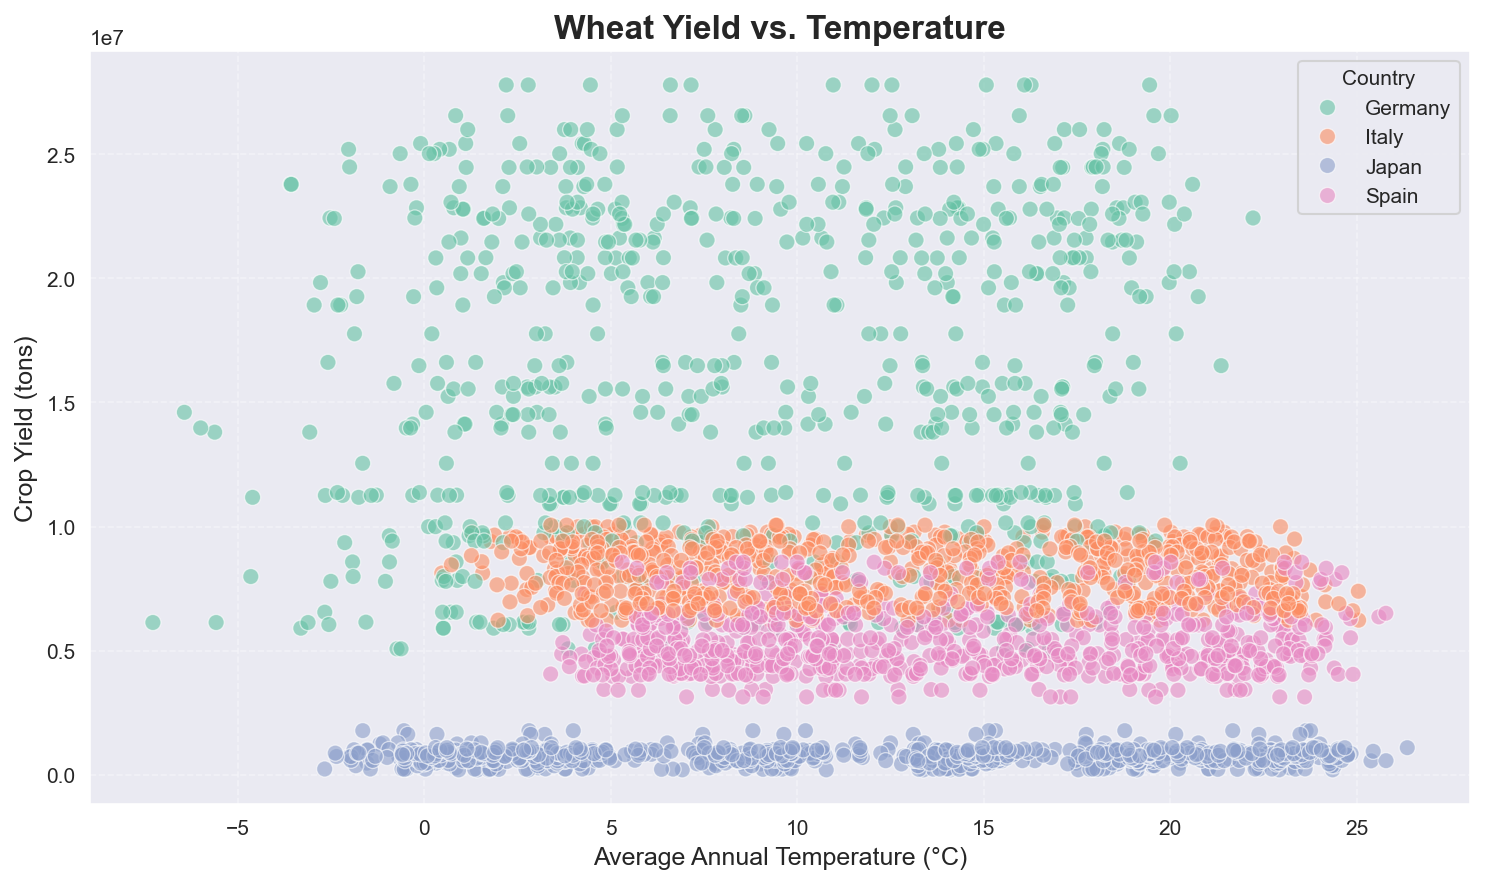

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

crop_name = "Wheat"
df_crop = df[df["Item"] == crop_name]
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(
    data=df_crop,
    x="Temperature (°C)",
    y="Value",
    hue="Country",
    alpha=0.6,
    edgecolor="w",
    s=60,
    palette="Set2"
)
plt.title(f"{crop_name} Yield vs. Temperature", fontsize=16, weight="bold")
plt.xlabel("Average Annual Temperature (°C)", fontsize=12)
plt.ylabel("Crop Yield (tons)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("Wheat Yield vs. Temperature.png", dpi=300)
plt.show()

# Part 5：dashboard



In [5]:
!streamlit run "../../src/cross-national study/5_dashboard.py"
#http://localhost:8501/

^C


# Part 6 Regression Analysis

## 6-1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 6-2. Set up File Paths and Load Datasets

In [2]:
# Get the directory where the current script is located
script_dir = os.path.dirname(os.path.abspath('__file__'))

# Construct full paths to each cross-national study file
climate_path = os.path.join(script_dir, "climate_data.csv")
agri_path = os.path.join(script_dir, "agricultural_production_data_LongPanel.csv")
control_path = os.path.join(script_dir, "four_country_control_variables.csv")

# Load datasets into pandas DataFrames
climate_df = pd.read_csv(climate_path)
agri_df = pd.read_csv(agri_path)
control_df = pd.read_csv(control_path)


## 6-3. Data Preprocessing

In [3]:
# (1) Climate cross-national study: Calculate average annual temperature by country and year
climate_avg = climate_df.groupby(['Country', 'Year'], as_index=False)['Temperature (°C)'].mean()
climate_avg.rename(columns={'Temperature (°C)': 'Avg_Temperature'}, inplace=True)

# (2) Agricultural production cross-national study: Filter for rows where Element = 'Production' and aggregate total production
agri_prod = agri_df[agri_df['Element'] == 'Production']
agri_total = agri_prod.groupby(['Area', 'Year'], as_index=False)['Value'].sum()
agri_total.rename(columns={'Area': 'Country', 'Value': 'Total_Production'}, inplace=True)

# (3) Control variables: Rename country column for consistency
control_df.rename(columns={'countryname': 'Country'}, inplace=True)

## 6-4. Merge Datasets

In [4]:
# Merge agricultural cross-national study with climate cross-national study
merged_df = pd.merge(agri_total, climate_avg, on=['Country', 'Year'], how='inner')

# Merge with control variables
merged_df = pd.merge(merged_df, control_df, on=['Country', 'Year'], how='inner')

## 6-5. Log-transform Selected Variables

In [5]:
# List of variables to be log-transformed
log_vars = ['Total_Production', 'Real GDP per capita', 'Nominal GDP', 'Population',
            'Government expenditure (%GDP)', 'Government revenue (%GDP)']

# Remove any rows with non-positive values before applying logarithm
for var in log_vars:
    merged_df = merged_df[merged_df[var] > 0]

# Create new columns for log-transformed variables
merged_df['Log_Total_Production'] = np.log(merged_df['Total_Production'])
merged_df['Log_GDP_per_capita'] = np.log(merged_df['Real GDP per capita'])
merged_df['Log_Nominal_GDP'] = np.log(merged_df['Nominal GDP'])
merged_df['Log_Population'] = np.log(merged_df['Population'])
merged_df['Log_Gov_Expenditure'] = np.log(merged_df['Government expenditure (%GDP)'])
merged_df['Log_Gov_Revenue'] = np.log(merged_df['Government revenue (%GDP)'])

## 6-6. Descriptive Statistics

In [6]:
# Generate summary statistics for key variables (both original and log-transformed)
desc_stats = merged_df[['Total_Production', 'Log_Total_Production',
                        'Avg_Temperature',
                        'Real GDP per capita', 'Log_GDP_per_capita',
                        'Nominal GDP', 'Log_Nominal_GDP',
                        'Population', 'Log_Population',
                        'Government expenditure (%GDP)', 'Log_Gov_Expenditure',
                        'Government revenue (%GDP)', 'Log_Gov_Revenue',
                        'Inflation (%)', 'Unemployment (%)']].describe()
print("\n[Descriptive Statistics]\n", desc_stats)


[Descriptive Statistics]
        Total_Production  Log_Total_Production  Avg_Temperature  \
count      2.510000e+02            251.000000       251.000000   
mean       2.052482e+08             19.089143        11.728636   
std        6.738518e+07              0.316011         1.932524   
min        8.619128e+07             18.272080         7.220112   
25%        1.592209e+08             18.885803        10.593322   
50%        1.814141e+08             19.016293        12.051781   
75%        2.320998e+08             19.261988        13.137858   
max        3.605451e+08             19.703128        15.453099   

       Real GDP per capita  Log_GDP_per_capita   Nominal GDP  Log_Nominal_GDP  \
count         2.510000e+02          251.000000  2.510000e+02       251.000000   
mean          7.536265e+05           11.101369  9.047356e+07        14.621687   
std           1.395592e+06            2.170739  1.841911e+08         3.126106   
min           6.236144e+03            8.738117  5.1740

## 6-7. Regression Analysis using OLS

In [7]:
# Define independent variables (including climate and control variables)
X = merged_df[['Avg_Temperature',
               'Log_GDP_per_capita', 'Log_Nominal_GDP', 'Log_Population',
               'Inflation (%)', 'Unemployment (%)',
               'Log_Gov_Expenditure', 'Log_Gov_Revenue']]

# Define dependent variable (log of total agricultural production)
y = merged_df['Log_Total_Production']

# Add a constant term to the model for the intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X, missing='drop')
results = model.fit()

# Print the summary of regression results
print("\n[Regression Results]\n", results.summary())


[Regression Results]
                              OLS Regression Results                             
Dep. Variable:     Log_Total_Production   R-squared:                       0.902
Model:                              OLS   Adj. R-squared:                  0.899
Method:                   Least Squares   F-statistic:                     278.4
Date:                  Sun, 15 Jun 2025   Prob (F-statistic):          2.04e-117
Time:                          17:44:34   Log-Likelihood:                 224.98
No. Observations:                   251   AIC:                            -432.0
Df Residuals:                       242   BIC:                            -400.2
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

## 6-8. Visualization

### Scatter Plot: Temperature vs Log Production

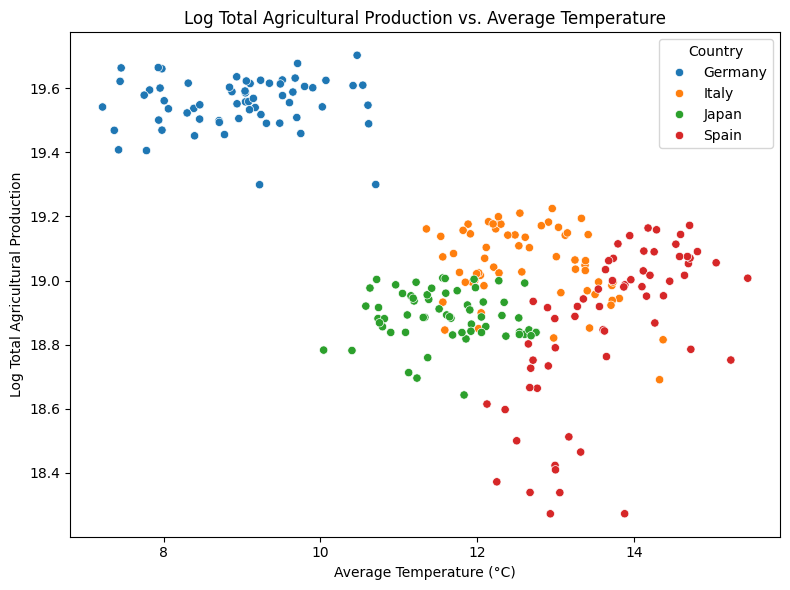

In [8]:
# Create and save scatter plot of temperature vs log production
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Temperature', y='Log_Total_Production', data=merged_df, hue='Country')
plt.title('Log Total Agricultural Production vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Log Total Agricultural Production')
plt.legend(title='Country', loc='best')
plt.tight_layout()
plt.savefig(os.path.join(script_dir, 'scatter_temp_vs_logprod.png'))
plt.show()
plt.close()

### Temperature Trends Over Time

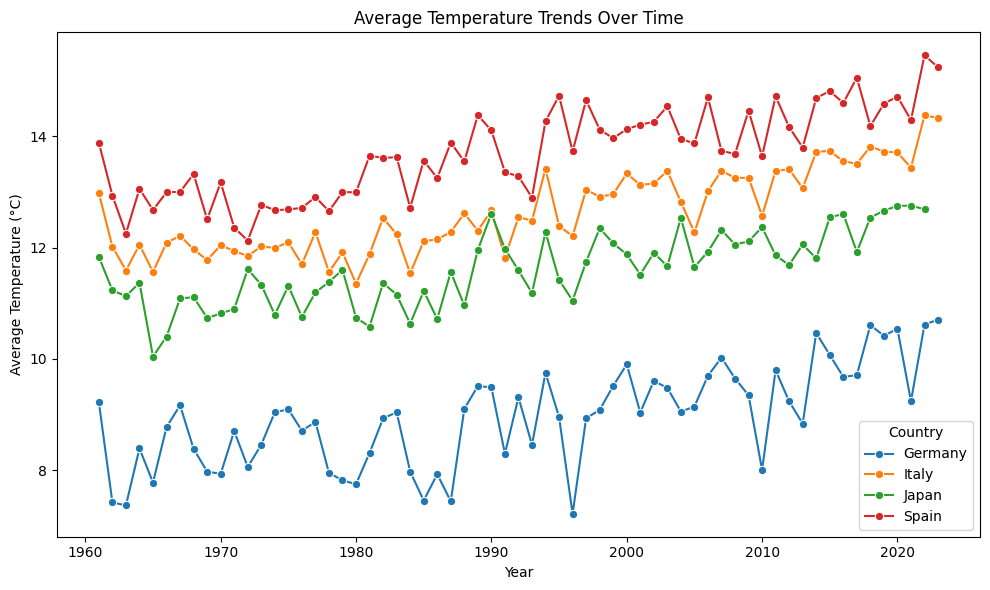

In [9]:
# Create and save a line plot showing temperature trends over time for each country
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Avg_Temperature', hue='Country', marker='o')
plt.title('Average Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.savefig(os.path.join(script_dir, 'temperature_trends.png'))
plt.show()
plt.close()

### Correlation Matrix

In [1]:
# Create and save a correlation heatmap for selected numeric columns
corr_matrix = merged_df[[
    'Log_Total_Production', 'Avg_Temperature',
    'Log_GDP_per_capita', 'Log_Nominal_GDP', 'Log_Population',
    'Inflation (%)', 'Unemployment (%)',
    'Log_Gov_Expenditure', 'Log_Gov_Revenue']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.savefig(os.path.join(script_dir, 'correlation_matrix.png'))
plt.show()
plt.close()

NameError: name 'merged_df' is not defined

### Model Diagnostics

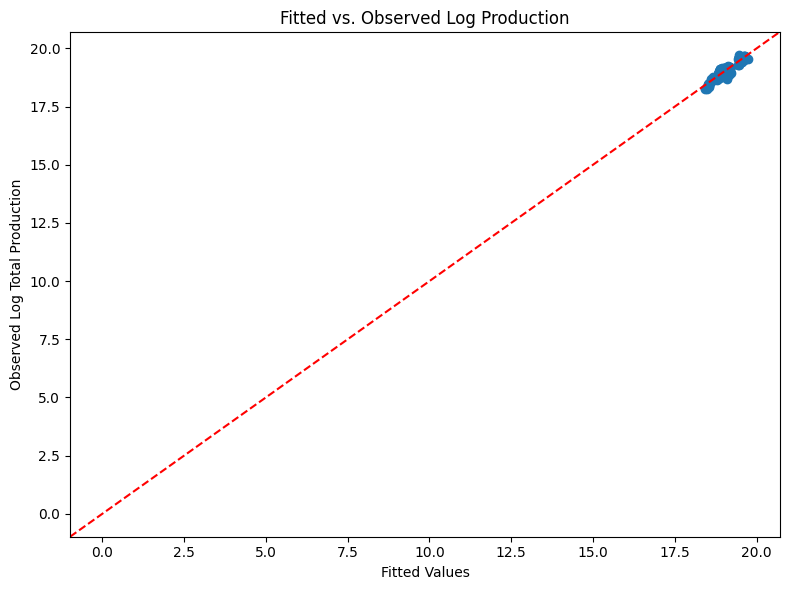

In [11]:
# Create and save a plot of fitted values vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, y)
plt.xlabel('Fitted Values')
plt.ylabel('Observed Log Total Production')
plt.title('Fitted vs. Observed Log Production')
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=1.5)
plt.tight_layout()
plt.savefig(os.path.join(script_dir, 'fitted_vs_observed.png'))
plt.show()
plt.close()

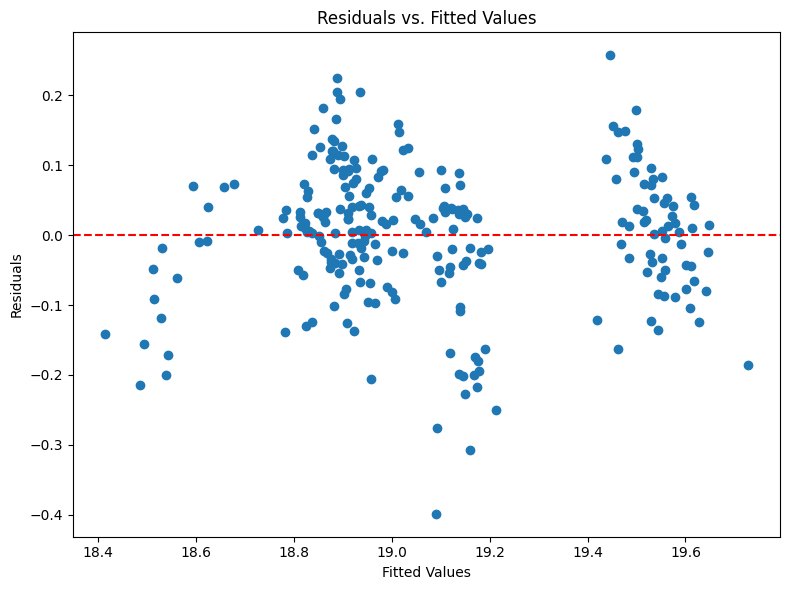

In [12]:
# Create and save a residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.tight_layout()
plt.savefig(os.path.join(script_dir, 'residuals_plot.png'))
plt.show()
plt.close()